In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [94]:
data=np.load('fit_exercise.npy')

In [95]:
def recta(x,parameters):
    r=parameters[0]*x+parameters[1]
    return r


def xisq(x,y,sigma,modelo,parameters):
    xi=((y-modelo(x,parameters))/sigma)**2
    r=np.sum(xi)    
    return r

def xisq(data,modelo,parameters):
    xi=((data[1]-modelo(data[0],parameters))/data[2])**2
    r=np.sum(xi)    
    return r


<ErrorbarContainer object of 3 artists>

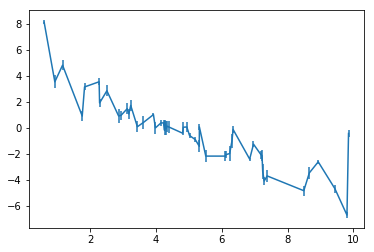

In [96]:
plt.errorbar(data[0],data[1],yerr=data[2])

In [97]:
red=10
mmin=-2
mmax=0
bmin=4
bmax=8

parameters=pd.DataFrame([np.linspace(mmin,mmax,num=red),np.linspace(bmin,bmax,num=red)])
r=99999999
a=pd.DataFrame(np.zeros([red,red]))
for i in range(0,red):
    for j in range(0,red):
        p1=parameters.iloc[0,i]
        p2=parameters.iloc[1,j]
        a=xisq(data,recta,[p1,p2])
        if(a<r):
            r=a
            m=p1
            b=p2
            
pares1=[m,b]

In [98]:
it=100
r=99999999
for i in range(it):
    p1=np.random.random_sample()*2-2
    p2=np.random.random_sample()*4+4
    a=xisq(data,recta,[p1,p2])
    if (a < r):
        r=a
        m=p1
        b=p2
pares2=[m,b]
pares2

[-1.058446934421578, 5.025302561191535]

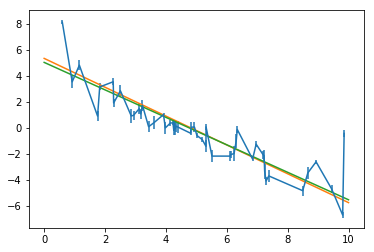

In [99]:
x=np.linspace(0,10,num=2)
y1=recta(x,pares1)
y2=recta(x,pares2)

plt.errorbar(data[0],data[1],yerr=data[2])
plt.plot(x,y1)
plt.plot(x,y2)

In [221]:
it=5000
r=99999999
a=np.zeros([5000,3])
for i in range(it):
    p1=np.random.random_sample()*2-2
    p2=np.random.random_sample()*8+2
    a[i]=[xisq(data,recta,[p1,p2]),p1,p2]
    
    if (a[i][0] <= r):
        r=a[i][0]
        m=p1
        b=p2
pares2=[m,b]

(array([1837.,  805.,  538.,  375.,  288.,  250.,  178.,  151.,  113.,
         112.,   91.,   63.,   51.,   38.,   30.,   23.,   21.,   20.,
           8.,    8.]),
 array([ 1236.32074905,  5091.17236863,  8946.02398821, 12800.87560779,
        16655.72722738, 20510.57884696, 24365.43046654, 28220.28208613,
        32075.13370571, 35929.98532529, 39784.83694487, 43639.68856446,
        47494.54018404, 51349.39180362, 55204.2434232 , 59059.09504279,
        62913.94666237, 66768.79828195, 70623.64990154, 74478.50152112,
        78333.3531407 ]),
 <a list of 20 Patch objects>)

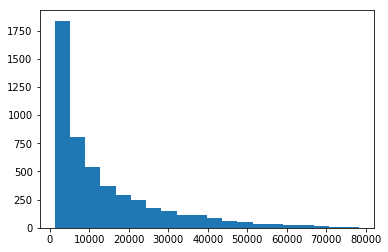

In [222]:
mat=pd.DataFrame(a)
plt.hist(mat[0],bins=20)

In [223]:
mat=mat[mat.iloc[:,0]<3000]
mat

,0,1,2
1,2030.689097,-0.679778,3.663482
2,1240.041982,-1.133724,5.679425
8,1479.490675,-1.201894,6.477208
9,2696.626139,-1.683906,7.904815
11,1421.043900,-1.307520,6.272018
14,2275.375555,-1.153448,6.876721
15,1593.508978,-0.800194,4.010436
21,2781.595038,-1.089434,3.917690
28,2479.811664,-1.580585,8.604677
36,1851.277226,-0.768260,3.210686


(array([26., 30., 48., 45., 64., 51., 71., 54., 66., 62., 70., 56., 55.,
        64., 61., 72., 62., 43., 30., 11.]),
 array([-1.78097727, -1.71341839, -1.6458595 , -1.57830062, -1.51074173,
        -1.44318285, -1.37562396, -1.30806508, -1.24050619, -1.17294731,
        -1.10538842, -1.03782954, -0.97027065, -0.90271177, -0.83515289,
        -0.767594  , -0.70003512, -0.63247623, -0.56491735, -0.49735846,
        -0.42979958]),
 <a list of 20 Patch objects>)

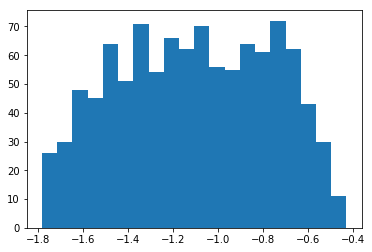

In [224]:
plt.hist(mat[1],bins=20)

(array([29., 47., 58., 47., 55., 60., 61., 71., 67., 60., 58., 63., 56.,
        69., 53., 33., 47., 50., 36., 21.]),
 array([2.00025946, 2.36203752, 2.72381559, 3.08559365, 3.44737171,
        3.80914978, 4.17092784, 4.5327059 , 4.89448397, 5.25626203,
        5.61804009, 5.97981816, 6.34159622, 6.70337428, 7.06515235,
        7.42693041, 7.78870847, 8.15048654, 8.5122646 , 8.87404267,
        9.23582073]),
 <a list of 20 Patch objects>)

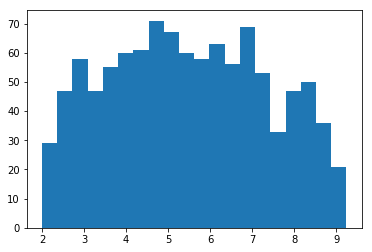

In [225]:
plt.hist(mat[2],bins=20)

In [86]:
def xisq(parameters,data,modelo):
    xi=((data[1]-modelo(data[0],parameters))/data[2])**2
    r=np.sum(xi)    
    return r

In [87]:
chisq=lambda *args: chi_square(*args)

In [90]:
scipy.optimize.minimize(chisq,args=())

TypeError: minimize() missing 1 required positional argument: 'x0'

In [91]:
scipy.optimize.minimize?